# Testing multi body class

In [1]:
import sys
sys.path.append('/Users/sstk4353/packages/.')

from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
from WIPL_python_analysis.DualPol import DualPol
from WIPL_python_analysis.MultiBody import MultiBody
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter
import WIPL_python_analysis.helper_functions as hf
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


sys.path.append('./')

In [2]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'
ELLIPSOIDS = 'multi_moth_outputs/three_ellipsoids/'
BERNARD_BODY = 'multi_moth_outputs/three_bernard_body/'

BERNARD_COMPARISON = 'Bernard/'
ELLIPSOID_COMPARISON = 'Ellipsoid/'

In [3]:
def calculate_rho_hv(data_dict, n_samples):
    horizontal_phi = np.zeros((n_samples, 181))
    vertical_theta = np.zeros((n_samples, 181))

    combo_level_correlation = np.zeros((n_samples, 181))
    combo_level_hh_power = np.zeros((n_samples, 181))
    combo_level_vv_power = np.zeros((n_samples, 181))


    rho_hv = np.zeros((n_samples, 181))

    for coordinate_row in range(n_samples):
        horizontal_phi[coordinate_row] = data_dict['H'][coordinate_row]['Ephi']
        vertical_theta[coordinate_row] = data_dict['V'][coordinate_row]['Etheta']

    coordinate_level_correlation = np.conj(horizontal_phi) * vertical_theta
    coordinate_level_hh_power = np.abs(horizontal_phi) ** 2
    coordinate_level_vv_power = np.abs(vertical_theta) ** 2

    mean_correlation = np.mean(coordinate_level_correlation, axis=0)
    mean_hh_power = np.mean(coordinate_level_hh_power, axis=0)
    mean_vv_power = np.mean(coordinate_level_vv_power, axis=0)
    rho_hv = np.abs(mean_correlation) / np.sqrt(mean_hh_power * mean_vv_power)
    return rho_hv

In [4]:
pol_list = ['H', 'V']
comparison_data_dict = {x: {} for x in pol_list}

In [5]:
for pol in pol_list:
    BODY_PATH = BASE_DRIVE_PATH + BERNARD_COMPARISON + f'parameterised/csv/morpho_analysis/Bernard_parameterised_560_{pol}_M_1000_body_p0_s0_df.csv'
    comparison_data_dict[pol]['Bernard_body'] = pd.read_csv(BODY_PATH)

    BODY_WING_PATH = BASE_DRIVE_PATH + BERNARD_COMPARISON + f'parameterised/csv/morpho_analysis/Bernard_parameterised_560_{pol}_M_1000_body_wing_p0_s0_df.csv'
    comparison_data_dict[pol]['Bernard_body_wing'] = pd.read_csv(BODY_WING_PATH)

    ELLIPSOID_BODY_PATH = BASE_DRIVE_PATH + ELLIPSOID_COMPARISON + f'parameterised/csv/Ellipsoid_parameterised_560_{pol}_1000_p0_s0__df.csv'
    comparison_data_dict[pol]['Ellipsoid'] = pd.read_csv(ELLIPSOID_BODY_PATH)

In [6]:
# Load the CSV file
coord_file = "three_bernard_coords_10_20_100_30.csv"
drive_path_to_coords = BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/multi_moth_outputs/coordinates/'
df_coords = pd.read_csv(drive_path_to_coords + coord_file)

In [7]:
mb = MultiBody(comparison_data_dict['H']['Ellipsoid'], comparison_data_dict['V']['Ellipsoid'],df_coords,5.6)

In [8]:
mb._calculate_direction_unit_vectors()

In [9]:
mb

In [10]:
mb._calculate_body_distance_vectors()

In [11]:
mb._calculate_projection_of_distance_onto_direction_unit_vectors()

In [12]:
mb._convert_relative_distances_to_phase_shifts()

In [13]:
mb._calculate_phase_shifts()

In [14]:
mb._extract_single_body_results()

In [15]:
mb._perform_phase_shifts()

In [16]:
mb.full_results_shifted.shape

(20, 2, 181, 4)

In [17]:
mb._calculate_resultant_voltages()

In [18]:
mb._dual_pol_calcs_on_recieved_voltages()

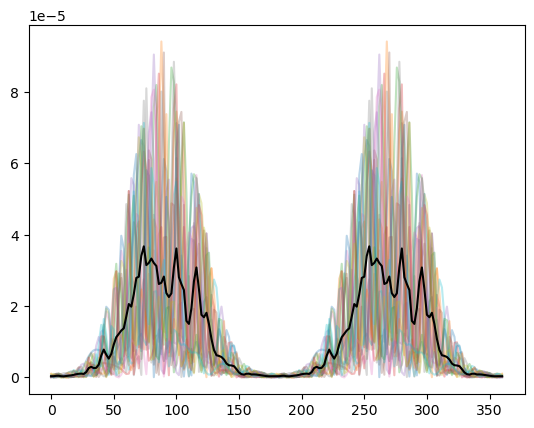

In [19]:
mean = np.mean(mb.horizontal_power, axis = 0)

for i in range(mb.num_combos):
    plt.plot(mb.phi_array, mb.horizontal_power[i, :], alpha = 0.3)

plt.plot(mb.phi_array, mean, color = 'black', label = 'Mean')


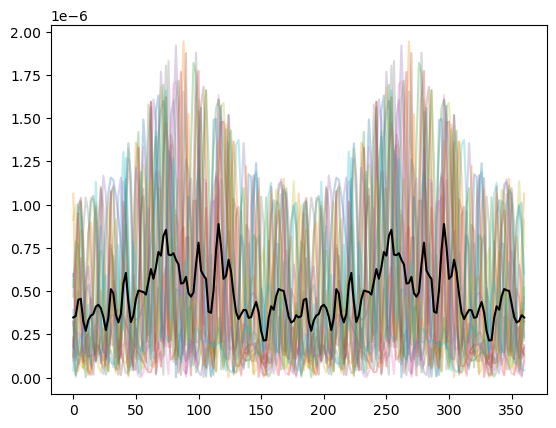

In [20]:
mean = np.mean(mb.vertical_power, axis = 0)

for i in range(mb.num_combos):
    plt.plot(mb.phi_array, mb.vertical_power[i, :], alpha = 0.3)

plt.plot(mb.phi_array, mean, color = 'black', label = 'Mean')

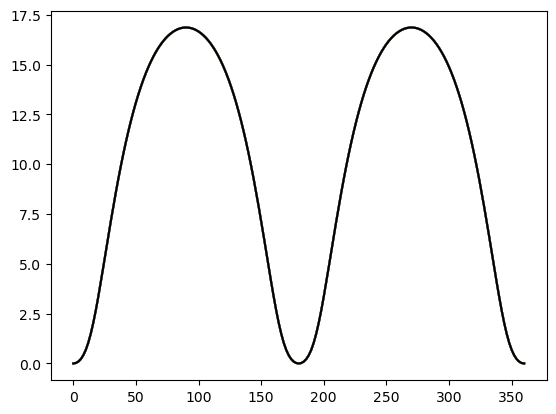

In [21]:
mean = np.mean(mb.differential_reflectivity, axis = 0)

for i in range(mb.num_combos):
    plt.plot(mb.phi_array, mb.differential_reflectivity[i, :], alpha = 0.3)

plt.plot(mb.phi_array, mean, color = 'black', label = 'Mean')

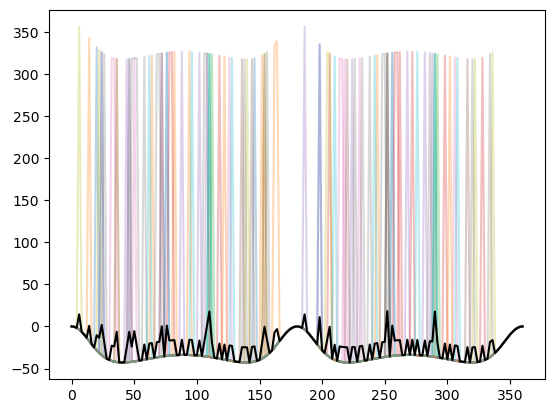

In [22]:
mean = np.mean(mb.differential_phase, axis = 0)

for i in range(mb.num_combos):
    plt.plot(mb.phi_array, mb.differential_phase[i, :], alpha = 0.3)

plt.plot(mb.phi_array, mean, color = 'black', label = 'Mean')

In [23]:
def de_alias(aliased_data):

    number_of_points = len(aliased_data)
    de_aliased_data = np.zeros(number_of_points)

    de_aliased_data[0] = aliased_data[0]

    for counter in range(1, number_of_points):

        difference = aliased_data[counter] - de_aliased_data[counter-1]
        if np.abs(difference) > 180:
            if difference > 0:
                de_aliased_data[counter] = aliased_data[counter] - 360
            elif difference < 0:
                de_aliased_data[counter] = aliased_data[counter] + 360
        else:
            de_aliased_data[counter] = aliased_data[counter]

    return de_aliased_data

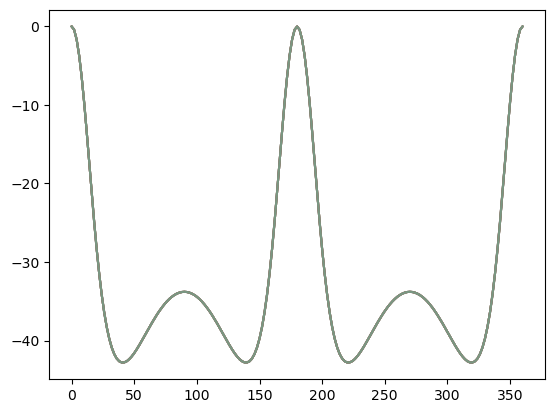

In [24]:
mean = np.mean(mb.differential_phase, axis = 0)

for i in range(mb.num_combos):
    plt.plot(mb.phi_array, de_alias(mb.differential_phase[i, :]), alpha = 0.3)

In [25]:
mb.calculate_rho_hv()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])